In [1]:
import pandas as pd
import seaborn as sns


path = 'D:\\Data\\Spectrum\\Qazi_data\\processed\\sess1819sem2\\'

student_log = pd.read_csv(f"{path}student_log.csv")
student_log["timecreated"] = pd.to_datetime(student_log["timecreated"], unit="s")
student_log = student_log[(student_log.timecreated >= pd.to_datetime("18-02-2019", format="%d-%m-%Y")) & (student_log.timecreated <= pd.to_datetime("30-06-2019", format="%d-%m-%Y"))].copy()

student_log2 = student_log[['userid','edulevel']].groupby(by=['userid']).sum()


final_df3 = pd.read_csv("./final_df3.csv")

final_df4 = pd.merge(final_df3,student_log2,how='inner', on='userid').drop(columns=['edulevel'])
Student_activity_summary = final_df4

scatdf = Student_activity_summary
scatdf.columns

scatdf = scatdf[['number_of_courses','total_marks','total_login','no_of_viewed_courses','no_of_attendance_taken','no_of_all_files_downloaded','no_of_assignments','no_of_forum_created','number_of_quizzes']]



## Total marks vs total login

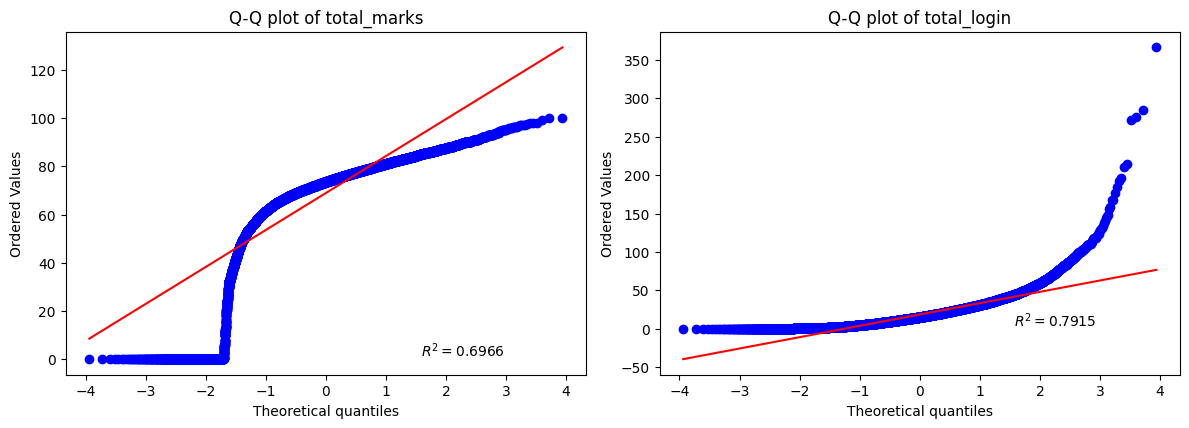

In [10]:
#scatdf['total_marks'].hist()

import scipy.stats as stats
import matplotlib.pyplot as plt

total_mark_login = scatdf[['total_marks','total_login']]

# Normality check for total marks and total login
num_columns = len(scatdf.columns)
cols = 2  # Number of columns in the grid
rows = (num_columns + cols - 1) // cols  # Calculate rows needed

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(12, rows * 4))
axs = axs.flatten()  # Flatten in case of a grid

for i, column in enumerate(total_mark_login.columns):
    stats.probplot(total_mark_login[column], dist="norm", plot=axs[i],rvalue=True)
    axs[i].set_title(f'Q-Q plot of {column}')

# Hide any unused subplots if the number of columns is not even
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

c:\Users\shahr\code\.mlenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,total_marks,total_login
total_marks,1.000000,0.163625
total_login,0.163625,1.000000


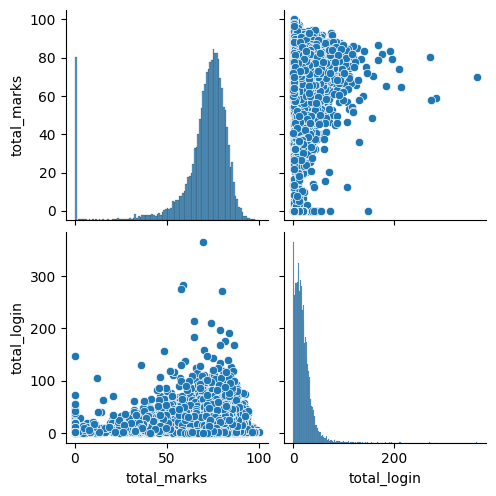

In [20]:
import seaborn as sns

sns.pairplot(total_mark_login)

total_mark_login.corr(method='pearson')


In [22]:
# Spearman correlation between total marks vs total login
print(stats.spearmanr(total_mark_login))
total_mark_login.corr(method='spearman') #this only gets the correlation value, not the p value. (statistical significance)
#total_mark_login.corr(method='kendall')

SignificanceResult(statistic=0.10029628630246194, pvalue=4.636175879738521e-39)


,total_marks,total_login
total_marks,1.000000,0.100296
total_login,0.100296,1.000000


In [29]:
x = stats.spearmanr(scatdf)
x.pvalue

array([[0.00000000e+000, 2.53822967e-090, 1.87976749e-049,
        7.30600138e-093, 7.42046596e-050, 1.83347340e-010,
        4.34621722e-161, 7.10407903e-079, 0.00000000e+000],
       [2.53822967e-090, 0.00000000e+000, 4.63617588e-039,
        7.33723350e-034, 1.19837811e-003, 8.86639905e-001,
        7.19350926e-134, 9.27328502e-074, 1.74255311e-021],
       [1.87976749e-049, 4.63617588e-039, 0.00000000e+000,
        0.00000000e+000, 1.25347334e-162, 9.44837989e-213,
        0.00000000e+000, 1.60213813e-054, 0.00000000e+000],
       [7.30600138e-093, 7.33723350e-034, 0.00000000e+000,
        0.00000000e+000, 4.14244821e-172, 7.01684382e-228,
        0.00000000e+000, 1.13532808e-085, 0.00000000e+000],
       [7.42046596e-050, 1.19837811e-003, 1.25347334e-162,
        4.14244821e-172, 0.00000000e+000, 5.16086080e-033,
        1.73824868e-228, 2.16291252e-006, 3.91314102e-078],
       [1.83347340e-010, 8.86639905e-001, 9.44837989e-213,
        7.01684382e-228, 5.16086080e-033, 0.0000000